#### Developed by [Nitin Tiwari](https://linkedin.com/in/tiwari-nitin).

This notebook is an implementation of building 3D visualizations of objects using Stable Video 3D (SV3D) from creative images generated with Imagen 3.

----
<a target="_blank" href="https://colab.research.google.com/github/NSTiwari/3D-Objects-with-Imagen3-SV3D/blob/main/Create_3D_Objects_with_Imagen3_SV3D.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

#### Step 1: Install Stable Video 3D

In [ ]:
!git clone https://github.com/chenguolin/sv3d-diffusers.git
%cd /content/sv3d-diffusers/
!pip install -r requirements.txt

Cloning into 'sv3d-diffusers'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 40 (delta 4), reused 32 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 12.24 MiB | 33.16 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/sv3d-diffusers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 2.9 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144555 sha256=6fe3434da6fa40569bccbe8e0495205087da659cdd4168f54e96ddaa4e67aa55
  Stored in directory: /root/.cache/pip/wheels/1a/97/32/461f837398029ad76911109f07047fde1d7b661a147c7c56d1
Successfully built antlr4-python3-runtime


#### Step 2: Import libraries and dependencies

In [ ]:
from google.colab import userdata

import vertexai
from vertexai.preview.vision_models import (
    ControlReferenceImage,
    Image,
    ImageGenerationModel,
    MaskReferenceImage,
    RawReferenceImage,
)

#### Initialize Vertex AI Client

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google import genai
import os

GCP_PROJECT_ID = userdata.get('GCP_PROJECT_ID')
client = genai.Client(vertexai=True, project=GCP_PROJECT_ID, location="us-central1")

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:502: UserWarning: <built-in function any> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


#### Step 3: Generate an image with Imagen 3

In [ ]:
prompt = "A reddish green coloured dragon flying, spitting fire, white background" # @param {type: 'string'}

output_image = "dragon.png" # @param {type: 'string'}
output_image = f"/content/images/{output_image}"
print(output_image)

/content/images/dragon.png


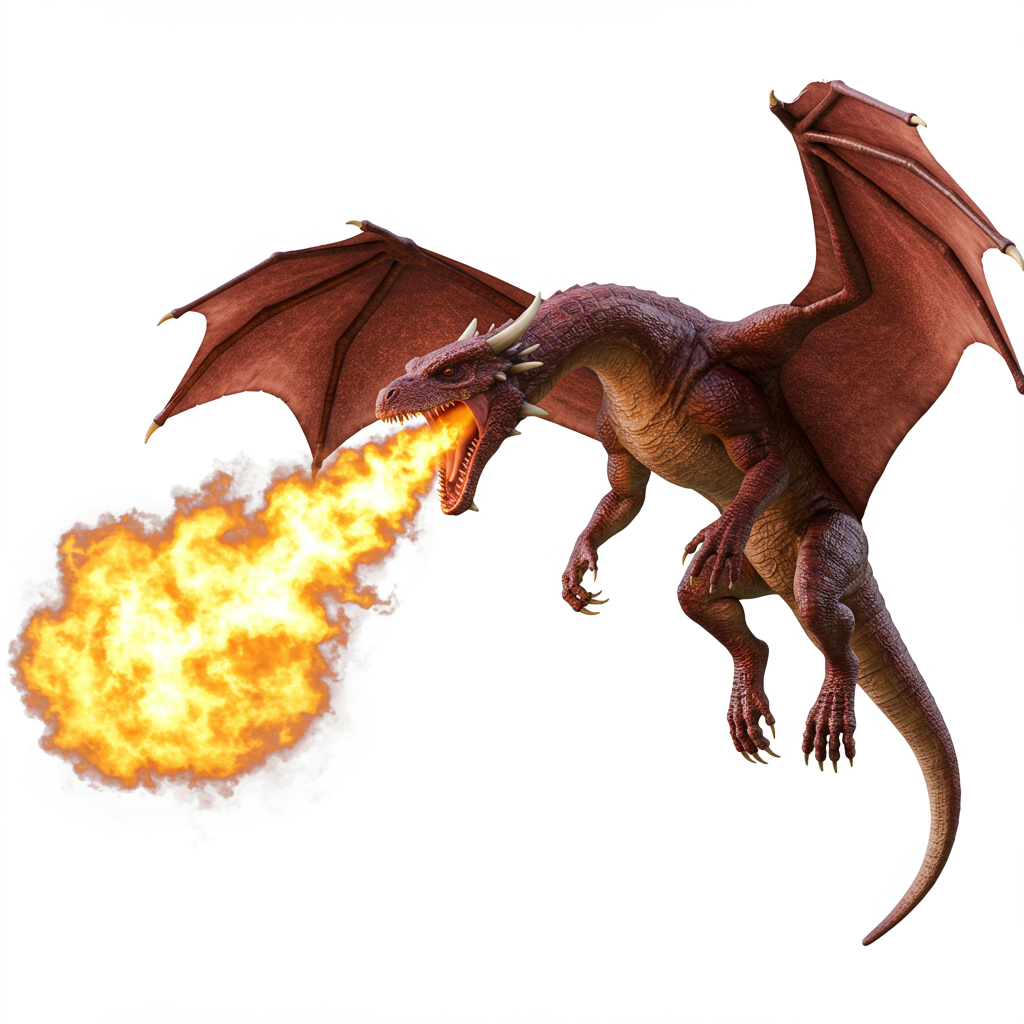

In [ ]:
if not os.path.exists('/content/images'):
    os.makedirs('/content/images')
    os.makedirs('/content/3d_images')

imagen_model = "imagen-3.0-generate-002"

response = client.models.generate_images(
    model=imagen_model,
    prompt=prompt,
)

response.generated_images[0].image.show()
response.generated_images[0].image.save(output_image)

#### Step 4: Create 3D visual using SV3D

In [ ]:
!python /content/sv3d-diffusers/infer.py \
  --output_dir /content/3d_images/ \
  --image_path $output_image \
  --elevation 10 \
  --half_precision \
  --seed -1

2025-02-24 12:43:17.284732: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-24 12:43:17.302472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740400997.325158    5840 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740400997.332085    5840 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-24 12:43:17.354653: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

#### Step 5: Display final output

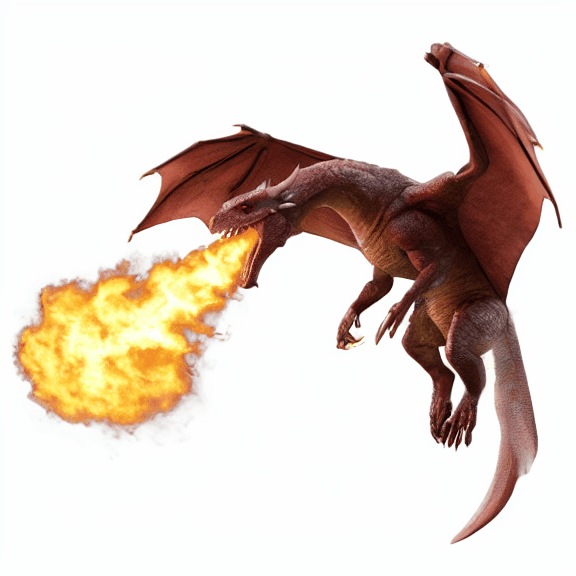

In [ ]:
from IPython.display import display, Image

gif_file = output_image.replace("png", "gif")
gif_file = gif_file.replace("images", "3d_images")
display(Image(filename=gif_file))